In [10]:
# Import the dependencies

import pyspark as ps
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set the pandas max_rows option to 500 to show all the die results

pd.set_option('display.max_rows', 500)

In [3]:
# Instantiate a SparkSession
spark = ps.sql.SparkSession.builder \
    .master('local') \
    .appName('Homework 3') \
    .getOrCreate()

# Get the sparkContext from the SparkSession
sc = spark.sparkContext

In [4]:
# This function returns the result of one roll of a fair n-sided die
#
# Arguments:
# n - number of sides of the die to be rolled
#
# Returns:
# A random number between 1 and n

def roll_die(n):
    return int(random.random()*n + 1)

In [5]:
# This function returns the result of rolling one or more die/dice with the specified number of sides
# the specified number of rolls
#
# Arguments:
# num_sides - the number of sides the die/dice have
# num_dice - the number of dice to be rolled
# num_rolls - the number of times to roll the die/dice
#
# Returns:
# outcomes - the list of outcomes for the rolled die/dice

def roll_dice(num_sides, num_dice, num_rolls):
    outcomes = []    # The list of lists of outcomes of the die/dice
    
    # for each die ...
    for i in range(num_dice):    
        # Generate the list off outcomes
        die = sc.parallelize(range(num_rolls)) \
          .map(lambda _: roll_die(num_sides)) \
          .collect()   
        outcomes.append(die)  # Append the outcomes of the current die to the outcomes list
    return outcomes   # The list containing the outcomes of the die/dice

In [6]:
# This function adds the corresponding entries of the dice that were rolled in roll number roll_num
#
# Arguments:
# outcomes (list of lists) -the list of outcomes for the rolled die/dice  
# roll_num (integer) - the index of the roll number to be added
#
# Returns:
# The sum (integer) of the outcomes of corresponding entries of the die/dices that were rolled in 
# rolled number roll_num

def add_elements(outcomes,roll_num):
    sum = 0                             # Initialize the sum of the die outcomes from roll roll_num to 0
    for n in range(len(outcomes)):      # For the outcomes of each die at roll_num
        sum += outcomes[n][roll_num]    # Add outcome from roll roll_num the current die to sum
        
    return sum     # Return the sum for roll roll_num 

In [7]:
# This function adds the outcomes of the die/dice and returns a list containing the sums of the corresponding
# elements of the lists in the outcomes list
#
# Arguments:
# outcomes (list of lists) -the list of outcomes for the rolled die/dice
#
# Returns:
# A list containing the sums of the corresponding elements of the lists in the outcomes list

def add_outcomes(outcomes):
    
    rdd = sc.parallelize(range(len(outcomes[0]))) \
            .map(lambda roll_num: add_elements(outcomes,roll_num) ) 
    return rdd.collect()

In [8]:
num_sides = 6                # The number of sides of the dice
num_dice = 2                 # The number of dice
num_rolls = 100              # The number of rolls

# The results of rolling num_dice num_rolls times (list of lists)
outcomes = roll_dice(num_sides,num_dice,num_rolls)     

# Add the corresponding elements of the list of die outcomes
sums = add_outcomes(outcomes)    

# Add the outcomes of the dice to a dataframe to display the results as a tab
df = pd.DataFrame({"die1": list(outcomes[0])})   # Create the results dataframe from the results of the first die       
for i in range(1,num_dice):                             # For each subsequent die, add the results as a new column
    df["".join(["die",str(i+1)])] = list(outcomes[i])

df["sums"] = list(sums)             # Finally, add the sums of the dice in a separate column

df

,die1,die2,sums
0,4,1,5
1,1,3,4
2,5,3,8
3,5,6,11
4,5,2,7
5,1,1,2
6,5,5,10
7,3,1,4
8,1,1,2
9,6,4,10


Text(0.5, 1.0, 'Times a Possible Outcome is Obtained from Rolling 2 Six-sides dice 100 times')

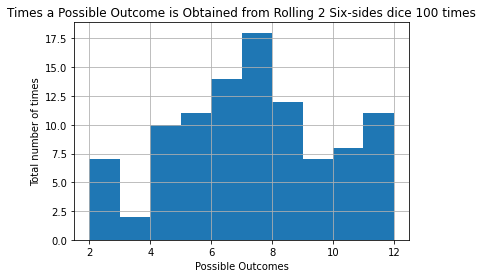

In [15]:
# Display the results in a histogram
df['sums'].hist()
plt.xlabel("Possible Outcomes")
plt.ylabel("Total number of times")
plt.title("Times a Possible Outcome is Obtained from Rolling 2 Six-sides dice 100 times")
